# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dewi Wahidatul Karimah
- **Email:** dewikarimah780@gmail.com
- **ID Dicoding:** dewi_karimah

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan peminjaman sepeda setiap harinya ?
- Bagaimana pengaruh hari-hari dalam minggu terhadap peminjaman sepeda ?
- Bagaimana penaruh musim terhadap peminjaman sepeda ?
- Bagaimana pengaruh hari kerja terhadap sepeda yang dipinjam ?

## Import Semua Packages/Library yang Digunakan

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [26]:
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

Data yang dipakai adalah jumlah peminjaman sepeda per harinya dari awal tahun 2011 sampai akhir tahun 2012.

### Assessing Data

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [28]:
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [29]:
print("Jumlah duplikasi: ", data.duplicated().sum())

Jumlah duplikasi:  0


In [30]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Terdapat kesalahan pada tipe data kolom 'dteday'. Tipe data pada kolom 'dteday' pada data tersebut adalah object yang seharusnya tipe datanya adalah datetime
- Tidak terdapat missing value dan duplikat data pada dataset
- Tidak adanya kesalahan nilai data pada setiap kolom dataset

### Cleaning Data

In [31]:
# Mengubah data dteday menjadi datetime
data['dteday'] = pd.to_datetime(data['dteday'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [32]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

Tipe data dteday yang awalnya bertipe object berubah menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore...

In [33]:
rental_df = data[['dteday','season', 'weekday', 'workingday', 'casual', 'registered', 'cnt']]
rental_df.head()


,dteday,season,weekday,workingday,casual,registered,cnt
0,2011-01-01,1,6,0,331,654,985
1,2011-01-02,1,0,0,131,670,801
2,2011-01-03,1,1,1,120,1229,1349
3,2011-01-04,1,2,1,108,1454,1562
4,2011-01-05,1,3,1,82,1518,1600


In [34]:
pd.options.mode.copy_on_write = True 

In [35]:
season_map = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
rental_df.loc[:,'season_map'] = rental_df['season'].map(season_map)
rental_df.head()

,dteday,season,weekday,workingday,casual,registered,cnt,season_map
0,2011-01-01,1,6,0,331,654,985,Spring
1,2011-01-02,1,0,0,131,670,801,Spring
2,2011-01-03,1,1,1,120,1229,1349,Spring
3,2011-01-04,1,2,1,108,1454,1562,Spring
4,2011-01-05,1,3,1,82,1518,1600,Spring


In [36]:
# Jumlah total peminjaman berdasarkan musim
season_total = rental_df.groupby('season_map')['cnt'].sum()
season_total_sorted = season_total.sort_values(ascending=False)
print(season_total_sorted)

season_map
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: cnt, dtype: int64


In [37]:
# Jumlah peminjam kasual dan yang terdaftar tiap musim
season_total = rental_df.groupby('season_map')[['casual', 'registered']].sum()
print(season_total)

            casual  registered
season_map                    
Fall        226091      835038
Spring       60622      410726
Summer      203522      715067
Winter      129782      711831


**Insight:**
- Musim gugur memiliki jumlah peminjam yang paling banyak di antara musim yang lain.
- Jumlah peminjam kasual dan yang terdaftar yang terbanyak berada pada musim gugur.

In [38]:
week_map = {1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 0:'Sunday'}
rental_df.loc[:,'week_map'] = rental_df['weekday'].map(week_map)
rental_df.head()

,dteday,season,weekday,workingday,casual,registered,cnt,season_map,week_map
0,2011-01-01,1,6,0,331,654,985,Spring,Saturday
1,2011-01-02,1,0,0,131,670,801,Spring,Sunday
2,2011-01-03,1,1,1,120,1229,1349,Spring,Monday
3,2011-01-04,1,2,1,108,1454,1562,Spring,Tuesday
4,2011-01-05,1,3,1,82,1518,1600,Spring,Wednesday


In [39]:
# Jumlah peminjaman sepeda berdasarkan hari
week_total = rental_df.groupby('week_map')['cnt'].sum()
week_total_sorted = week_total.sort_values(ascending=False)
print(week_total_sorted)

week_map
Friday       487790
Thursday     485395
Saturday     477807
Wednesday    473048
Tuesday      469109
Monday       455503
Sunday       444027
Name: cnt, dtype: int64


In [40]:
# Jumlah peminjam sepeda kasual dan yang terdaftar tiap hari
week_total = rental_df.groupby('week_map')[['casual', 'registered']].sum()
print(week_total)

           casual  registered
week_map                     
Friday      78238      409552
Monday      70784      384719
Saturday   153852      323955
Sunday     140521      303506
Thursday    61460      423935
Tuesday     57843      411266
Wednesday   57319      415729


**Insight:**
- Jumlah peminjam sepeda terbanyak ada pada hari Jum'at.
- Peminjam kasual paling banyak meminjam pada hari Sabtu, sedangkan peminjam terdaftar paling banyak meminjam sepeda pada hari Kamis.

In [41]:
workday_map = {0:'Holiday', 1:'Work'}
rental_df.loc[:,'workday_map'] = rental_df['workingday'].map(workday_map)
rental_df.head()

,dteday,season,weekday,workingday,casual,registered,cnt,season_map,week_map,workday_map
0,2011-01-01,1,6,0,331,654,985,Spring,Saturday,Holiday
1,2011-01-02,1,0,0,131,670,801,Spring,Sunday,Holiday
2,2011-01-03,1,1,1,120,1229,1349,Spring,Monday,Work
3,2011-01-04,1,2,1,108,1454,1562,Spring,Tuesday,Work
4,2011-01-05,1,3,1,82,1518,1600,Spring,Wednesday,Work


In [42]:
# Jumlah peminjaman sepeda berdarkan hari kerja
work_total = rental_df.groupby('workday_map')['cnt'].sum()
work_total_sorted = work_total.sort_values(ascending=False)
print(work_total_sorted)

workday_map
Work       2292410
Holiday    1000269
Name: cnt, dtype: int64


In [43]:
# Jumlah peminjaman sepeda oleh user kasual dan register berdasarkan hari kerja
work_total = rental_df.groupby('workday_map')[['casual', 'registered']].sum()
print(work_total)

             casual  registered
workday_map                    
Holiday      316732      683537
Work         303285     1989125


**Insight:**
- Jumlah peminjam sepeda terbanyak ada pada hari kerja dibandingkan dengan hari libur.
- Peminjam kasual paling banyak meminjam pada hari libur, sedangkan peminjam terdaftar paling banyak meminjam sepeda pada hari Kerja.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perkembangan peminjaman sepeda setiap harinya ?

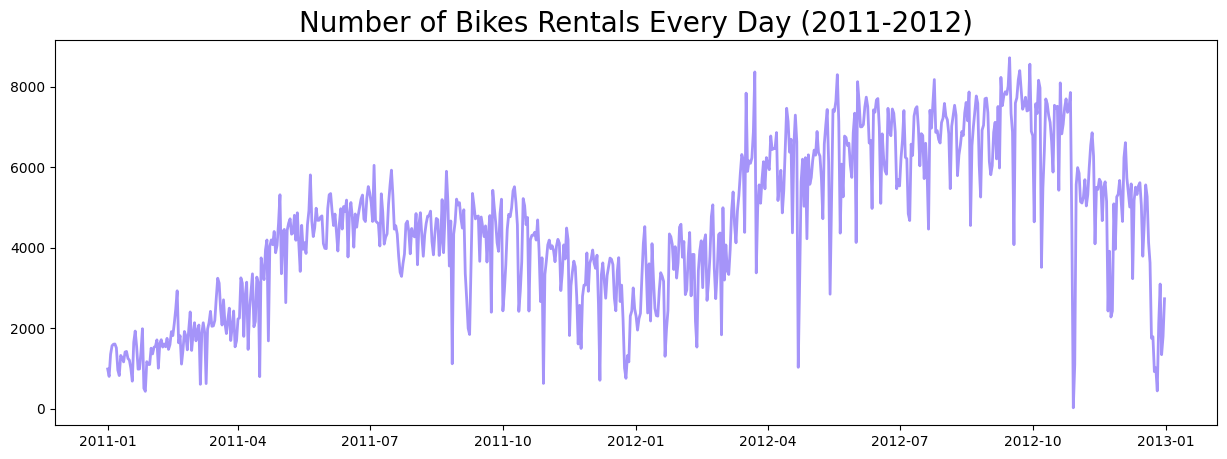

In [44]:
plt.figure(figsize=(15, 5)) 
plt.plot(rental_df["dteday"], rental_df["cnt"], linewidth=2, color="#A594F9") 
plt.title("Number of Bikes Rentals Every Day (2011-2012)", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

**Insight:**
- Dari gambar grafik di atas, dapat dilihat peminjaman sepeda di akhir tahun 2011 sampai awal tahun 2012, hal ini bisa terjadi kemungkinan dikarenakan pada bulan tersebut memasuki musim salju dan musim semi. Grafik mulai naik kembali ketika bulan Februari 2012 sampe akhir tahun 2012, kenaikan ini bisa terjadi kemungkinan dikarenakan pada bulan-bulan tersebut memasuki musim panas, dan gugur.

### Pertanyaan 2: Bagaimana pengaruh hari-hari dalam minggu terhadap peminjaman sepeda ?

C:\Users\Dewi\AppData\Local\Temp\ipykernel_9816\864993192.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


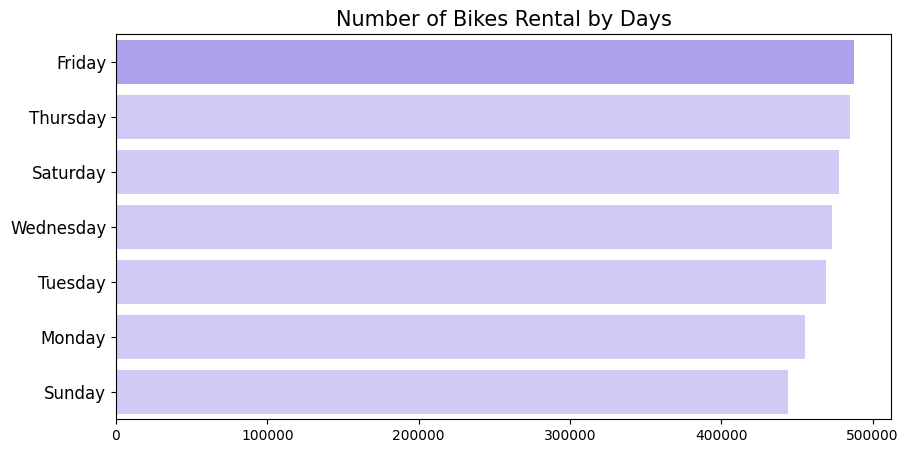

In [45]:
sum_bike_days = rental_df.groupby("week_map").cnt.sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
colors_ = ["#A594F9", "#CDC1FF", "#CDC1FF", "#CDC1FF", "#CDC1FF", "#CDC1FF", "#CDC1FF"]
sns.barplot(
    x="cnt", 
    y="week_map",
    data=sum_bike_days.sort_values(by="cnt", ascending=False),
    palette=colors_
)
plt.title("Number of Bikes Rentals by Days", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight:**
- Dari gambar grafik dapat dilihat bahwa orang orang paling suka meminjam sepeda pada hari Jum'at dibandingkan dengan hari lainnya. Beberapa kemunkinan penyebabnya adalah karena hari Jum'at mendekati akhir pekan dan beberapa kantor yang kemungkinan memiliki kebijakan half day pada hari Jum'at.

### Pertanyaan 3: Bagaimana pengaruh musim terhadap peminjaman sepeda ?

C:\Users\Dewi\AppData\Local\Temp\ipykernel_9816\489237199.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


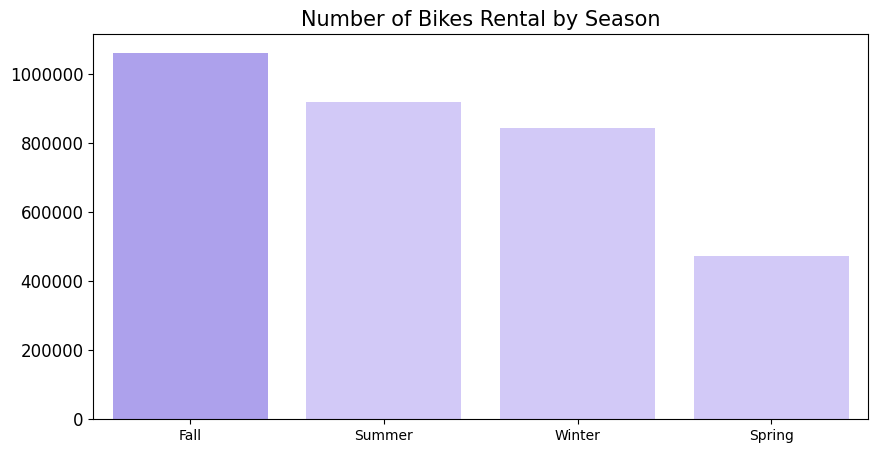

In [46]:
sum_bike_season = rental_df.groupby("season_map").cnt.sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
colors_ = ["#A594F9", "#CDC1FF", "#CDC1FF", "#CDC1FF"]
sns.barplot(
    x="season_map", 
    y="cnt",
    data=sum_bike_season.sort_values(by="cnt", ascending=False),
    palette=colors_
)

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.title("Number of Bikes Rentals by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight:**
- Dari gambar grafik dapat dilihat bahwa orang orang suka meminjam sepeda ketika musim gugur daripada musim yang lainnya. Hal ini bisa terjadi dikarenakan musim gugur memiliki cuaca yang lebih sejuk dan nyaman daripada musim yang lainnya.

### Pertanyaan 4: Bagaimana pengaruh hari kerja terhadap sepeda yang dipinjam ?

C:\Users\Dewi\AppData\Local\Temp\ipykernel_9816\2293366530.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


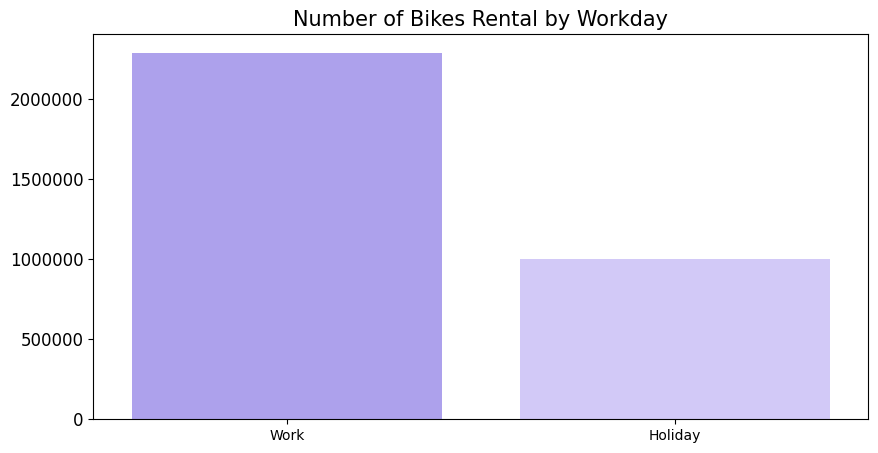

In [47]:
sum_bike_workday = rental_df.groupby("workday_map").cnt.sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
colors_ = ["#A594F9", "#CDC1FF"]
sns.barplot(
    x="workday_map", 
    y="cnt",
    data=sum_bike_workday.sort_values(by="cnt", ascending=False),
    palette=colors_
)

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.title("Number of Bikes Rentals by Workday", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight:**
- Dari gambar grafik di atas dapat dilihat bahwa peminjaman sepeda terbanyak ketika memasuki hari kerja dibandingkan hari libur. Hal ini bida terjadi karena banyak orang orang yang berangkat kerja menggunakan sepeda.

## Conclusion

- Peminjaman sepeda sempat mengalami penurunan di di akhir tahun 2011 sampai awal tahun 2012 dan mengalami kenaikan bulan Maret 2012 sampe akhir tahun 2012. Penyebab penurunan dan kenaikan berkaitan dengan perubahan musim pada wilayah tersebut.
- Peminjaman sepeda paling banyak dilakukan di hari Jum'at dibandingkan dengan hari lainnya dikarenakan beberapa hal seperti hari Jum'at adalah hari yang paling mendekati akhir pekan dan beberapa kantor yang kemungkinan memiliki kebijakan half day.
- Peminjaman sepeda paling banyak dilakukan ketika memasuki musim gugur dikarenakan musim tersebut memiliki cuaca yang lebih sejuk dan nyaman untuk bersepeda.
- Peminjaman sepeda paling banyak dilakukan orang orang pada hari kerja dibandingkan hari libur. Hal ini bisa terjadi karena orang orang suka mengendarai sepeda ketika berangkat bekerja.